In [8]:
import os
import django


# Set up Django settings
os.environ["DJANGO_SETTINGS_MODULE"] = "memoria.settings"
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

django.setup()

# Now you can import your models and work with them
from core.models import Noticia

# Example: Query all objects
noticia = Noticia.objects.get(pk=4)

In [3]:
noticia.enlace

'https://www.elpais.com.uy/informacion/sociedad/imm-inicio-investigacion-administrativa-por-presunta-guerra-de-agua-dentro-del-edificio-el-fin-de-ano-pasado'

In [ ]:
from core.parse import *

url = noticia.enlace

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/92.0.4515.107 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/",
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract Open Graph meta tags
og_title = soup.find("meta", property="og:title")
og_image = soup.find("meta", property="og:image")

title = None
if og_title and og_title["content"] not in BAD_TITLES:
    title = og_title["content"]


In [6]:
og_image["content"]

'https://imgs.elpais.com.uy/dims4/default/4a3167c/2147483647/strip/true/crop/5000x2431+0+451/resize/1440x700!/quality/90/?url=https%3A%2F%2Fel-pais-uruguay-production-web.s3.us-east-1.amazonaws.com%2Fbrightspot%2F70%2Fb7%2Fb038953e42c197b331c596a4bcd5%2Fnia6672.JPG'

In [9]:
noticia.delete()

(9, {'core.Voto': 1, 'core.NoticiaEntidad': 7, 'core.Noticia': 1})

In [ ]:
original_image = None
# maybe url is encoded
if og_image:
    decoded_url = urllib.parse.unquote(og_image["content"])
    if decoded_url not in BAD_URLS:
        og_image_parts = decoded_url.split("https")
        original_image = "https" + og_image_parts[-1]
    # convert

In [4]:
noticia.get_title_from_meta_tags()

Title: la diaria, Image: https://ladiaria.com.uy/static/meta/la-diaria-1000x1000.png


In [30]:
original_url = "https://ladiaria.com.uy/colonia/articulo/2025/2/el-combate-al-macro-y-microtrafico-de-estupefacientes-conllevo-a-que-todos-los-demas-delitos-pudieran-bajar-segun-jefe-de-policia-de-colonia/"


In [31]:
from core.archive_ph import *

In [ ]:
# Some minimal data; the archive service expects a "url" parameter.
data = {"url": original_url, "submitid": "1"}
response = requests.get(f"https://archive.is/{original_url}")


'\n<!DOCTYPE html>\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\n<meta content="width=device-width, initial-scale=1, minimal-ui" name="viewport" />\n<title>archive.is</title>\n</head>\n<!-- 190.133.149.0 @ AS6057 -->\n<!-- archive.is -->\n<!-- bvm1 -->\n<!-- bvm1 -->\n<!-- 47f56493e551459ad91fdee8f61435f3 -->\n<!-- python-requests/2.32.3 -->\n<!-- A18 -->\n<body style="margin:0">\n <div lang="en-US" style="overflow-x:visible;overflow-y:visible;color:rgb(0, 0, 0);-webkit-locale:&quot;en-US&quot;;opacity:1">\n  <div style="margin-bottom:0px;margin-left:0px;margin-right:0px;margin-top:0px;min-height:1367.48px;min-width:1024px;overflow-x:visible;overflow-y:visible;display:block;padding-bottom:0px;padding-left:0px;padding-right:0px;padding-top:0px">\n   <div style="color:rgb(64, 64, 64);font-family:&quot;Open Sans&quot;, Helvetica, Arial, sans-serif;font-size:15px;-webkit-font-smoothing:antialiased;display:block;letter-spacing:normal;line-height:1.5;
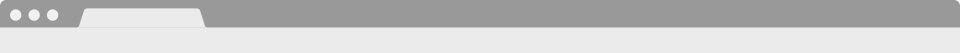
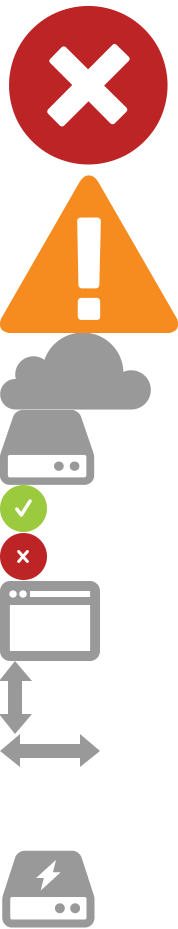

In [43]:
response.text

In [ ]:
# If the response is a redirect, assume the archive URL is in the Location header.
if response.status_code == 302 and "Location" in response.headers:
    archive_url = response.headers["Location"]
    if archive_url == "https://archive.ph/wip":
        raise ArchiveInProgress(f"Archiving in progress for {url}")
    print(archive_url, get_archive_details(response.text), response.text)


In [ ]:
# Otherwise, try to extract the archive URL from the HTML using regex.
match = re.search(r"(https?://archive\.ph/\w+)", response.text)
if match:
    archive_url = match.group(1)
    if archive_url == "https://archive.ph/wip":
        raise ArchiveInProgress(f"Archiving in progress for {url}")
    print(archive_url, get_archive_details(response.text), response.text)


In [ ]:
raise ArchiveFailure(
    f"Failed to capture {url} via archive.ph (status: {response.status_code})"
)

Title: la diaria
Image: https://ladiaria.com.uy/static/meta/la-diaria-1000x1000.png


In [10]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/2f/a6/fc66ea71ec0769f72abdf15cb9ec9269517abe68a160839383ddff7478f1/selenium-4.29.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/c9/55/c4d9bea8b3d7937901958f65124123512419ab0eb73695e5f382521abbfb/trio-0.29.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/c7/19/eb640a397bba49ba49ef9dbe2e7e5c04202ba045b6ce2ec36e9cadc51e04/trio_websocket-0.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for websocket-client~=1.8 from https://files.pythonhosted.org/packages/5a/84/44687a29792a70e111c5c477230a72c4b957d88d16141199bf9acb7537a3/websocket_client-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for sortedcontainers from https://files.pythonhosted.org/packages/32/46/9cb0e58b2deb7f82b84065f37f3bffeb12413f947f9388e4ca

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")
# Mimic a real browser's user agent (you can also try mimicking WhatsApp's crawler UA)
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/92.0.4515.107 Safari/537.36"
)

driver = webdriver.Chrome(options=chrome_options)
driver.get(original_url)

# Wait a few seconds for the page to load completely (adjust as needed)
time.sleep(5)

# Get the rendered HTML
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

# Extract meta tags (e.g., OpenGraph title and image)
og_title = soup.find("meta", property="og:title")
og_image = soup.find("meta", property="og:image")

title = og_title["content"] if og_title else None
image = og_image["content"] if og_image else None

print("Title:", title)
print("Image:", image)

driver.quit()


Title: la diaria
Image: https://ladiaria.com.uy/static/meta/la-diaria-1000x1000.png


In [ ]:
from core import archive


In [3]:
wayback_url = archive.get_wayback_latest_snapshot(original_url)
html = archive.fetch_wayback_snapshot(wayback_url)
details = archive.parse_wayback_details(html)

In [4]:
details

{'title': 'Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta | la diaria | Uruguay',
 'archive_date': '2025-02-25T00:54:47+00:00',
 'screenshot_url': 'http://web.archive.org/web/20250226133810im_/https://ladiaria.com.uy/media/photologue/photos/cache/cargos_RS261834_20250224_MVU-6892_article_main.jpg?r=UwRU3mYx0ByPEpPP',
 'archive_url': 'http://web.archive.org/web/20250226133810/https://ladiaria.com.uy/politica/articulo/2025/2/gobierno-electo-le-ofrecio-34-cargos-a-la-oposicion-y-la-coalicion-se-reunira-para-hacer-una-contrapropuesta/'}

In [13]:
result = check_wayback(article)
if not result:
    save_link = f"https://web.archive.org/save/{article}"
    print("No snapshot found. You can save it here:", save_link)
else:
    print("Snapshot found:", result)

Snapshot found: http://web.archive.org/web/20250226133810/https://ladiaria.com.uy/politica/articulo/2025/2/gobierno-electo-le-ofrecio-34-cargos-a-la-oposicion-y-la-coalicion-se-reunira-para-hacer-una-contrapropuesta/


In [5]:
from core import parse

markdwon = parse.parse_noticia_markdown(html, metadata["title"])


In [6]:
print(markdwon)

# Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta

**Fuente:** la diaria

**Autor:** No especificado

Este lunes, en la sede de la transición de gobierno, el edificio Plaza Alemania, el futuro secretario de Presidencia, Alejandro Sánchez, y el próximo prosecretario de Presidencia, Jorge Díaz, recibieron a los representantes de los partidos de la oposición para hacer oficial la propuesta de cargos. A la reunión asistieron el senador y excandidato Álvaro Delgado, por el Partido Nacional (PN), el senador y secretario general del Partido Colorado (PC), Andrés Ojeda, el exsenador Guido Manini Ríos, líder de Cabildo Abierto (CA), Pablo Mieres, líder del Partido Independiente, y el diputado Gustavo Salle, líder de Identidad Soberana. Este último, como ya había adelantado, informó que no aceptará cargos.

El gobierno electo ofreció a la oposición 34 cargos: seis en la Corte Electoral (cuatro ministros, un secretario letrado y un subd

In [7]:
google_flash = "openrouter/mistralai/mistral-saba"

In [25]:
dolphin = "openrouter/perplexity/r1-1776"

In [26]:
md2 = parse.parse_noticia_markdown(html, metadata["title"], dolphin)

In [27]:
print(md2)

```markdown
# Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta

## El senador blanco Álvaro Delgado adelantó que plantearán “diferentes responsabilidades, que no están consideradas hoy”, así como “algunos enfoques diferentes”

**Fuente:** la diaria  
**Publicado el:** 24 de febrero de 2025  

Este lunes, en la sede de la transición de gobierno, el edificio Plaza Alemania, el futuro secretario de Presidencia, Alejandro Sánchez, y el próximo prosecretario de Presidencia, Jorge Díaz, recibieron a los representantes de los partidos de la oposición para hacer oficial la propuesta de cargos. A la reunión asistieron el senador y excandidato Álvaro Delgado, por el Partido Nacional (PN), el senador y secretario general del Partido Colorado (PC), Andrés Ojeda, el exsenador Guido Manini Ríos, líder de Cabildo Abierto (CA), Pablo Mieres, líder del Partido Independiente, y el diputado Gustavo Salle, líder de Identidad Soberana. Este último

In [31]:
res_flash = parse.parse_noticia(markdwon, google_flash)
print(res_flash.model_dump())

{'titulo': 'Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta', 'fuente': 'la diaria', 'categoria': 'politica', 'autor': None, 'resumen': 'El gobierno electo ofreció 34 cargos a la oposición en una reunión en la sede de la transición de gobierno. Los representantes de los partidos de la oposición asistieron y discutieron la propuesta. La oposición se reunirá para hacer una contrapropuesta.', 'entidades': [{'nombre': 'Alejandro Sánchez', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Jorge Díaz', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Álvaro Delgado', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Andrés Ojeda', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Guido Manini Ríos', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Pablo Mieres', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Gustavo Salle', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre':

In [ ]:
res_o3 = parse.parse_noticia(markdown=markdwon)
print(res_o3.model_dump())

{'titulo': 'Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta', 'fuente': 'la diaria', 'categoria': None, 'autor': None, 'resumen': 'El senador blanco Álvaro Delgado adelantó que plantearán “diferentes responsabilidades, que no están consideradas hoy”, así como “algunos enfoques diferentes”', 'entidades': [{'nombre': 'Álvaro Delgado', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Alejandro Sánchez', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Jorge Díaz', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Andrés Ojeda', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Guido Manini Ríos', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Pablo Mieres', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Gustavo Salle', 'tipo': 'persona', 'sentimiento': 'neutral'}, {'nombre': 'Partido Nacional', 'tipo': 'organizacion', 'sentimiento': 'neutral'}, {'nombre': 'Partido Colorado'

In [ ]:
deep = "openrouter/deepseek/deepseek-r1"
res_deep = parse.parse_noticia(markdown=markdwon, model=deep)
print(res_deep.model_dump())

KeyboardInterrupt: 

In [ ]:
# pretty print
def pretty_print_articulo(obj):
    print(f"Titulo: {obj.titulo}")
    print(f"Fuente: {obj.fuente}")
    print(f"Categoria: {obj.categoria}")
    print(f"Resumen: {obj.resumen}")
    print(f"Cantidad de entidades: {len(obj.entidades)}")
    for entidad in obj.entidades:
        print(f"Entidad: {entidad}")

In [34]:
pretty_print_articulo(res_flash)

Titulo: Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta
Fuente: la diaria
Categoria: politica
Resumen: El gobierno electo ofreció 34 cargos a la oposición en una reunión en la sede de la transición de gobierno. Los representantes de los partidos de la oposición asistieron y discutieron la propuesta. La oposición se reunirá para hacer una contrapropuesta.
Cantidad de entidades: 35
Entidad: nombre='Alejandro Sánchez' tipo='persona' sentimiento='neutral'
Entidad: nombre='Jorge Díaz' tipo='persona' sentimiento='neutral'
Entidad: nombre='Álvaro Delgado' tipo='persona' sentimiento='neutral'
Entidad: nombre='Andrés Ojeda' tipo='persona' sentimiento='neutral'
Entidad: nombre='Guido Manini Ríos' tipo='persona' sentimiento='neutral'
Entidad: nombre='Pablo Mieres' tipo='persona' sentimiento='neutral'
Entidad: nombre='Gustavo Salle' tipo='persona' sentimiento='neutral'
Entidad: nombre='Partido Nacional' tipo='organizacion' sentimiento='n

In [21]:
pretty_print_articulo(res_o3)

Titulo: Gobierno electo le ofreció 34 cargos a la oposición y la coalición se reunirá para hacer una contrapropuesta
Fuente: la diaria
Categoria: None
Resumen: El senador blanco Álvaro Delgado adelantó que plantearán “diferentes responsabilidades, que no están consideradas hoy”, así como “algunos enfoques diferentes”
Cantidad de entidades: 11
Entidad: nombre='Álvaro Delgado' tipo='persona' sentimiento='neutral'
Entidad: nombre='Alejandro Sánchez' tipo='persona' sentimiento='neutral'
Entidad: nombre='Jorge Díaz' tipo='persona' sentimiento='neutral'
Entidad: nombre='Andrés Ojeda' tipo='persona' sentimiento='neutral'
Entidad: nombre='Guido Manini Ríos' tipo='persona' sentimiento='neutral'
Entidad: nombre='Pablo Mieres' tipo='persona' sentimiento='neutral'
Entidad: nombre='Gustavo Salle' tipo='persona' sentimiento='neutral'
Entidad: nombre='Partido Nacional' tipo='organizacion' sentimiento='neutral'
Entidad: nombre='Partido Colorado' tipo='organizacion' sentimiento='neutral'
Entidad: nombr